In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('Advertising.csv')


#### This Advertising Dataset contains statistics about the sales of product x in 200 different markets. The media channels are TV, Radio, and Newspaper with their own advertising budget.
#### The idea is to improve revenue growth by predicting which media combination maximizes a ROI.

In [3]:
data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


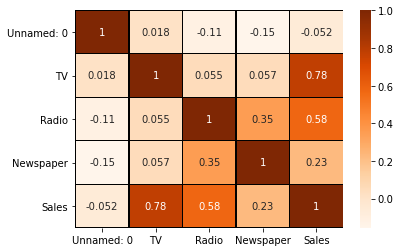

In [5]:
sns.heatmap(data.corr(),annot=True, cmap='Oranges', linewidth=.3, linecolor='black')
plt.show()

#### This Pearson correlation measures the strength of a linear relationship between sales and each variable. All media channels are positively correlated with sales.  So more of product x will push sales higher. This heat map concisely shows TV media is highly correlated with sales (78%), followed by radio media(58%), while newspaper media is the least effective media in driving sales. (23%). 

<AxesSubplot:xlabel='TV', ylabel='Sales'>

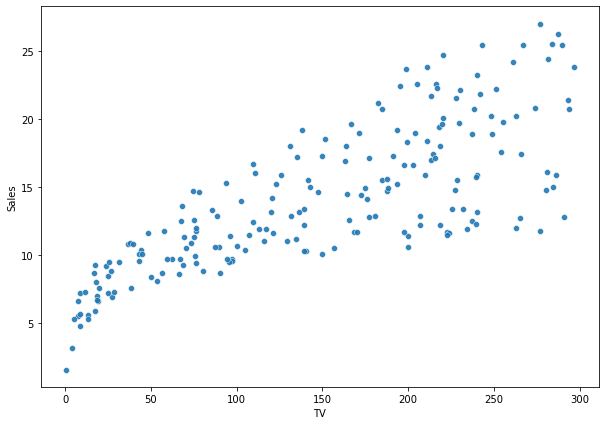

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(x="TV", y="Sales", data=data, alpha=0.90)

#### TV media and Sales have a strong positive linear relationship.

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

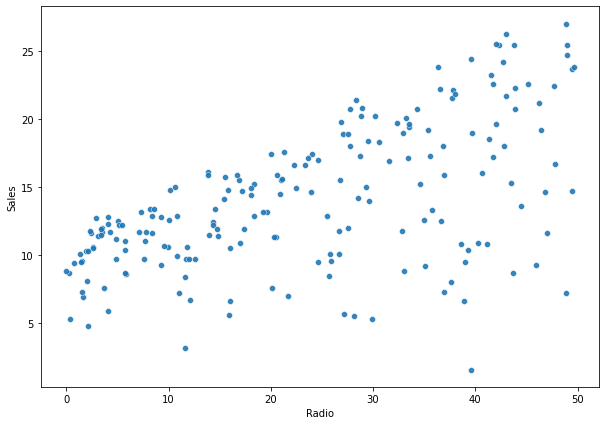

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(x="Radio", y="Sales", data=data, alpha=0.90)

#### Radio media and sales have a greater than 50% positive linear relationship.

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

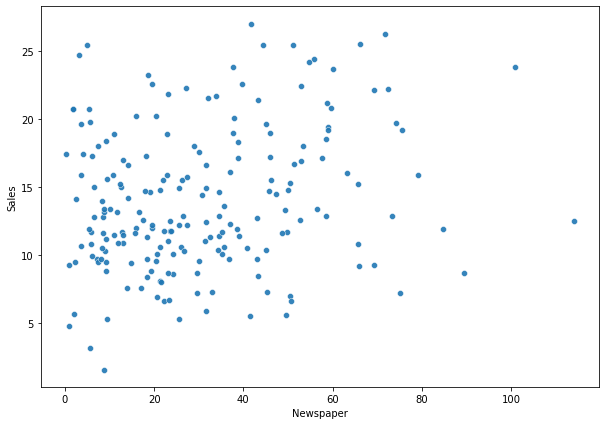

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(x="Newspaper", y="Sales", data=data, alpha=0.90)

#### Newspaper media and sales have a weak positive correlation.

In [9]:
round(data.describe(),3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000,200.000
mean,100.500,147.042,23.264,30.554,14.023
std,57.879,85.854,14.847,21.779,5.217
min,1.000,0.700,0.000,0.300,1.600
25%,50.750,74.375,9.975,12.750,10.375
50%,100.500,149.750,22.900,25.750,12.900
75%,150.250,218.825,36.525,45.100,17.400
max,200.000,296.400,49.600,114.000,27.000


<AxesSubplot:xlabel='TV'>

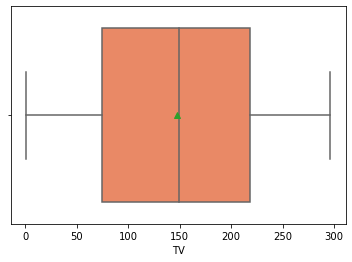

In [10]:
sns.boxplot(data['TV'], showmeans=True, color='coral')
            


#### The mean of TV markets driving sales are approximately 150 markets.  Total markets 200.

<AxesSubplot:xlabel='Radio'>

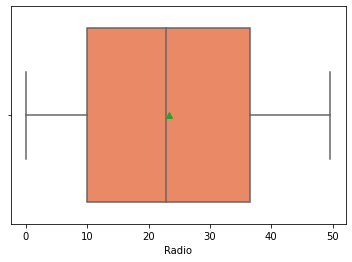

In [11]:
sns.boxplot(data['Radio'], showmeans=True, color='coral')


#### Radio media has a mean of approximately 25 and is evenly distributed among the markets.

<AxesSubplot:xlabel='Newspaper'>

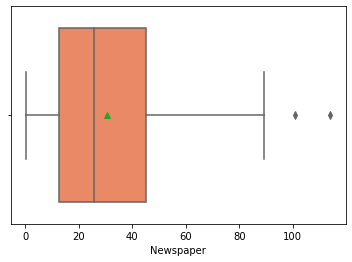

In [12]:
sns.boxplot(data['Newspaper'], showmeans=True, color='coral')


#### Newspaper media has outliers pulling the mean of newpaper media higher.  Outliers need to be looked at for specific markets which may change financial allocation.

In [13]:
round(data['Newspaper'].describe(),3)

count    200.000
mean      30.554
std       21.779
min        0.300
25%       12.750
50%       25.750
75%       45.100
max      114.000
Name: Newspaper, dtype: float64

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

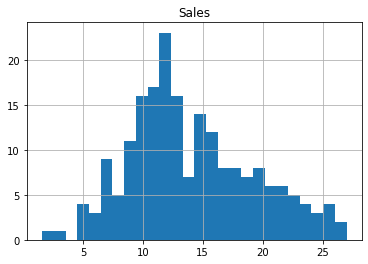

In [14]:
data.hist('Sales', bins=26)


array([[<AxesSubplot:title={'center':'TV'}>]], dtype=object)

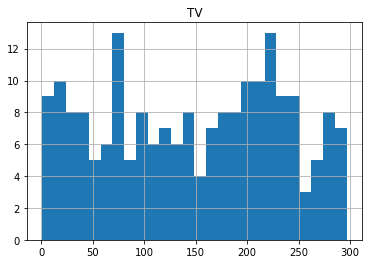

In [15]:
data.hist('TV', bins=26)


array([[<AxesSubplot:title={'center':'Radio'}>]], dtype=object)

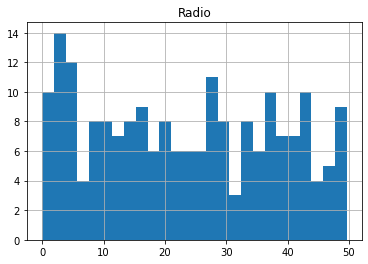

In [16]:
data.hist('Radio', bins=26)


array([[<AxesSubplot:title={'center':'Newspaper'}>]], dtype=object)

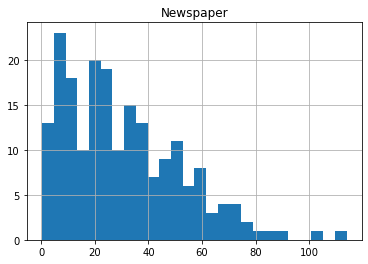

In [17]:
data.hist('Newspaper', bins=26)


Text(0, 0.5, 'Sales [Thousands of Units]')

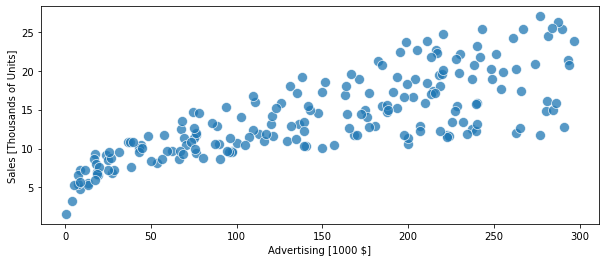

In [18]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x="TV", y="Sales", data=data, s = 100, alpha=0.75)
plt.xlabel('Advertising [1000 $]')
plt.ylabel('Sales [Thousands of Units]')


In [19]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)


In [20]:
X2 = data[['TV', 'Radio']]
y2 = data['Sales']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=2, test_size=0.2)

In [21]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)


LinearRegression()

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [23]:
import numpy as np
print(np.round(model.intercept_, 4))

print([np.round(val, 4) for val in model.coef_])


3.0545
[0.0474, 0.1732, 0.0047]


In [24]:
coefficient = list(zip(data.columns[1:4].tolist(), model.coef_))


In [25]:
tvcoefficient = coefficient[0][1]
tvcoefficient


0.04735257168501801

In [26]:
coefficient

[('TV', 0.04735257168501801),
 ('Radio', 0.17323832458475985),
 ('Newspaper', 0.004665187200519365)]

In [27]:
radiocoefficient = coefficient[1][1]
radiocoefficient

0.17323832458475985

In [28]:
newscoefficient = coefficient[2][1]
newscoefficient

0.004665187200519365

In [29]:
tvterm = X_test.iloc[0:1,0] * tvcoefficient


In [30]:
X_test.iloc[0:1,0]

112    175.7
Name: TV, dtype: float64

In [31]:
radioterm =X_test.iloc[0:1,1] * radiocoefficient

In [32]:
newsterm = X_test.iloc[0:1,2] * newscoefficient

In [33]:
tvterm + radioterm + newsterm + model.intercept_

112    14.053366
dtype: float64

In [34]:
X_test.iloc[0:3]

,TV,Radio,Newspaper
112,175.7,15.4,2.4
29,70.6,16.0,40.8
182,56.2,5.7,29.7


In [35]:
y_test.iloc[0:3]

112    14.1
29     10.5
182     8.7
Name: Sales, dtype: float64

In [36]:
y_pred = model.predict(X_test)


In [37]:
y_pred[0:3]

array([14.0533655 ,  9.3596964 ,  6.84168105])

In [38]:
model.score(X_test,y_test)


0.7575894500772719

In [39]:
model.score(X_train,y_train)

0.9151707412454462

In [40]:
model2.score(X_test2,y_test2)

0.7629335290913724

In [41]:
model2.score(X_train2,y_train2)

0.9148698946311157